<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/mnist_tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.MNIST 분류

### 1-1. 환경 구성: import


In [ ]:
import tensorflow as tf    # tensorflow의 별명은 tf로 한다
from tensorflow import keras

print(tf.__version__)      # version 앞뒤로 두 개의 밑줄

2.15.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1-2. MNIST 데이터 가져오기



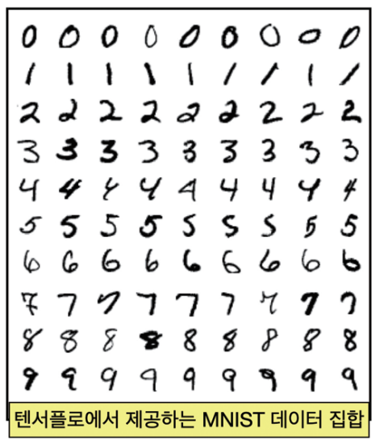

- 텐서플로가 제공하는 학습 데이터셋중 하나
- MNIST는 Modified National Institute of Standards and Technology의 약어
- 미국 인구 조사국에서 수집한 손글씨 숫자 데이터 집합을 기계학습에 적합하도록 수정한 이미지 집합

- 28x28 픽셀 크기의 회색조 이미지

- 성능 좋은 컴퓨터가 아니라도 충분히 빠른 처리가 가능
- 전처리 과정을 통해서 가운데 정렬, 크기 균일화가 잘 이루어져 있어서 이미지 처리와 머신러닝에 매우 적합

- 0부터 9까지의 손글씨 이미지가 각각 6,000장으로 모두 6만 장

- 테스트를 위한 데이터로 1만 장의 이미지가 따로 준비되어 있음

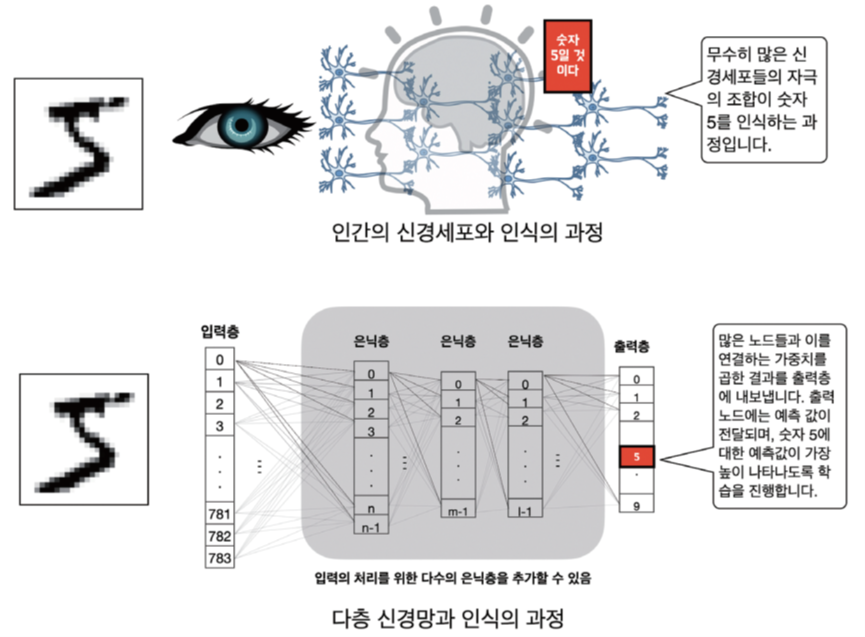

In [ ]:
# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
# keras.datasets.mnist.load_data()의
#결과 2개의 return값을 반환하므로 튜플로 묶어서 받음. train set, test set

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 1-3. 데이터 살펴보기

In [ ]:
print('X_train.shape =', X_train.shape, 'y_train.shape =', y_train.shape)
print('X_test.shape  =', X_test.shape, 'y_test.shape  =', y_test.shape)

X_train.shape = (60000, 28, 28) y_train.shape = (60000,)
X_test.shape  = (10000, 28, 28) y_test.shape  = (10000,)


In [ ]:
num = X_train[0]

#28픽셀 이미지
for i in range(28):
    for j in range(28):
        print(f'{num[i][j]:4d}', end='')

    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

 MNIST 데이터를 이미지로 살펴보기

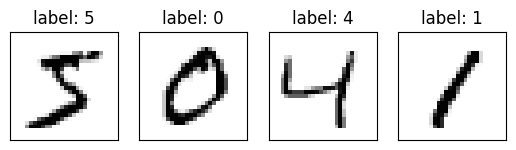

In [ ]:
for i in range(4):
    plt.subplot(1, 4, i+1) #1row, 4columns
    plt.title(f"label: {y_train[i]}")  #label값

    #ax = plt.gca()#현재 Axes 객체를 반환, 축의 눈금 생략시에는 필요없음
    #ax.axes.xaxis.set_visible(False)
    #ax.axes.yaxis.set_visible(False)

    plt.imshow(X_train[i], cmap='Greys') # i번째 훈련용 데이터
    #Matplot에는 여러 개의 Color를 섞은 Colormap이 있습니다.
    # cmap의
    #import matplotlib.cm
    #print(matplotlib.cm.cmap_d.keys())

### 1-4. 데이터 전처리

In [ ]:
#입력값 전처리 : 0에서 1사이의 값으로 입력 데이터를 가공함-정규화  > 최대값이 255이므로
#이산적 값보다, 연속적인 값을 입력으로 사용하는 것이 더 나은 결과 얻을 수 있음

X_train, X_test = X_train / 255, X_test / 255

### 1-5. 심층 신경망 모델 만들기

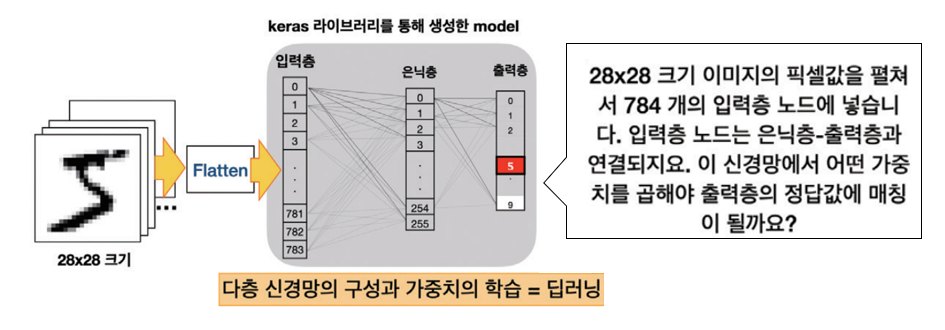

- keras.Sequential() 클래스는 그림과 같이 입력층, 은닉층, 출력층이 존재하는 순차적 연결 구조를 가지는 신경망 모델을 생성

- 순차적 심층 신경망은 입력값으로 2차원 배열을 사용할 수 없기 때문에 이를 Flatten() 클래스를 사용하여 1차원 객체로 만든다



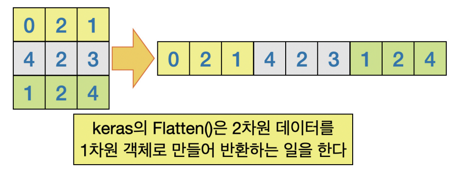

- Dense() 두층에 촘촘히 연결을 구성하는 Dense 네트워크, 학습을 위한 연결을 밀집된 구조로, 완전 연결층으로 한다는 의미, 매개변수는 출력층의 갯수

- 신경망을 각 노드에 대한 예측값을 임의의 실수로 반환하는데 이 값들을 0에서 1 사이의 확률값으로 만들어 주는 것이 소프트맥스 함수

- 생성된 신경망은 경사하강법을 이용하여 오차를 줄이는 방향으로 햑습을 진행하며, 오차 역전파를 이용하여 가장 좋은 가중치와 편향값을  찾아 나간다


-2차원 이미지를 1차원 배열로 구성하면 이미지의 기하학적 정보가 손실 - CNN



#### (1) 모델 구성: Sequential(), Flatten(), Dense() ...

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### (2) 모델 요약 보기: summary()

> - 입력층 노드: 28*28 = 784
> - 입력층-은닉층 연결: 784*256+256(편향)) = 200,960
> - 은닉층-출력층 연결: (256+1) * 10 = 2,570
> - 전체 파라미터 개수: 200,960 + 2,570 = 203,530

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### (3) 학습 과정 설정: compile()

신경망학습은 추측을 한 뒤 정답과 비교하여 오차가 얼마인지 확인한 후 오차를 줄이는 방법으로 연결강도를 조절, 이때 **오차를 측정**하는 방법, 오차를 줄여 **최적화** 하는 법, **평가지표**를 정해야 한다.

- 옵티마이저(optimizer) : 모델을 개선하여 오차를 줄여 최적화하는 것. SGD, adam 등
- 손실함수(loss) : 오차측정
> - 분류: sparse_categorical_crossentropy : 다중분류 손실함수. int타입 클래스에 사용(int가 아닌 경우 categorical_crossentropy 사용)
 - 회귀: mse, mas,
- 평가지표 (metric): 훈련을 모니터링 하기 위해 사용, 분류에서는 accuracy, 회귀에서는 mse, rmse, r2, mae, mspe, mape, msle
https://wooono.tistory.com/99


[옵티마이저]

https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam

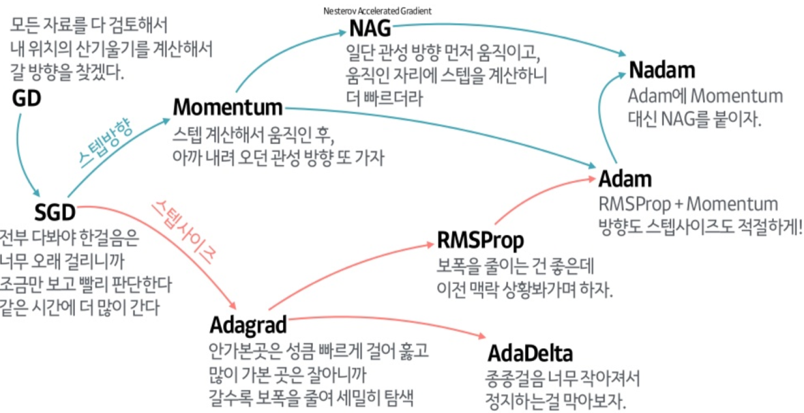

[손실함수]
1. binary_crossentropy (이항 교차 엔트로피)
y값이 (ex. 0,1) 인 이진 분류기를 훈련할 때 자주 사용되는 손실 함수 (multi-label classification)
활성화 함수 : sigmoid 사용 (출력값이 0과 1사이의 값)
수식
아래 함수에 예측값(Yi) 과 실제값(ti) 에 1을 대입하면, 수식은 0에 수렴하게 됨
아래 함수에 예측값(Yi =0)과 실제값(ti = 1)을 대입한다면, 수식은 양의 무한대가 됨
따라서 이진 분류에 적합


2. categorical_crossentropy (범주형 교차 엔트로피)
출력을 클래스 소속 확률에 대한 예측으로 이해할 수 있는 문제에서 사용 (즉, 레이블 (y) 클래스가 2개 이상일 경우 사용 즉, 멀티클래스 분류에 사용됨)
활성화 함수 : softmax (모든 벡터 요소의 값은 0과 1사이의 값이 나오고, 모든 합이 1이 됨)
라벨이 (0,0,1,0,0) , (0,1,0,0,0) 과 같이 one-hot encoding 된 형태로 제공될 때 사용 가능
수식
아래 수식에서 C 는 클래스의 개수
실제값과 예측값이 모두 동일하게 될 경우 손실함수의 값은 0이 나옴
실제값과 예측값이 다를 경우 수식에 대입하면 양의 무한대로 발산


3. sparse_categorical_crossentropy
tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)
범주형 교차 엔트로피와 동일하게 멀티 클래스 분류에 사용
one-hot encoding 된 상태일 필요 없이 정수 인코딩 된 상태에서 수행 가능
라벨이 (1,2,3,4) 이런식으로 정수형태일때 사용!


4. 평균 제곱 오차 손실 (means squared error, MSE)
신경망의 출력(^y)과 타겟(y)이 연속값인 회귀 문제에서 널리 사용하는 손실함수
회귀문제에 사용될 수 있는 다른 손실 함수
평균 절댓값 오차 (Mean absolute error, MAE)
평균 제곱근 오차 (Root mean squared error, RMSE)
예측과 타겟값의 차이를 제곱하여 평균한 값 (모두 실숫값으로 계산)
MSE가 크다는 것은 평균 사이에 차이가 크다는 뜻 / MSE가 작다는 것은 데이터와 평균사이의 차이가 작다는 뜻
즉, MSE는 데이터가 평균으로부터 얼마나 떨어져있나를 보여주는 손실함수
연속형 데이터를 사용할 때 주로 사용 (주식 가격 예측 등)

[평가지표 (metric): 분류]

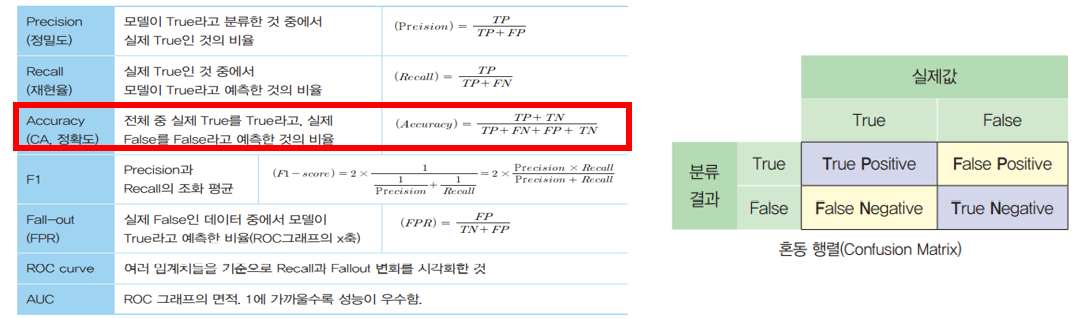

[평가지표 (metric): 회귀]

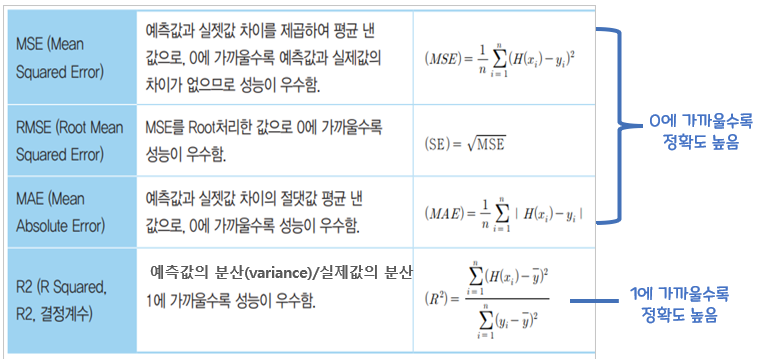

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

#### (4) 모델 학습: fit()

- 배치사이즈(batch_size) : 전체 트레이닝 데이터 셋을 여러 작은 그룹을 나누었을 때 batch size는 하나의 소그룹에 속하는 데이터 수를 의미, 전체 트레이닝 셋을 작게 나누는 이유는 트레이닝 데이터를 통째로 신경망에 넣으면 비효율적 리소스 사용으로 학습 시간이 오래 걸리기 때문입니다.
- 에포크(epochs) : 전체 트레이닝 셋이 신경망을 통과한 횟수 의미,1-epoch는 전체 트레이닝 셋이 하나의 신경망에 적용되어 순전파와 역전파를 통해 신경망을 한 번 통과했다는 것을 의미
- verbose : 학습 진행 정도를 표시하는 모드(디폴트 1)
> - 0 : 아무표시 안 함
> - 1 : 에폭당 손실값, 정확도, 진행표시
> - 2 : 에폭당 손실값, 정확도, 진행표시 안함

In [ ]:
# https://keras.io/api/models/model_training_apis/
# batch_size를 입력하지 않으면 기본값은 32이다. 60000/32=1875
#테스트에서 수행한 경우 acc가 낮다 > 반복해서 추가학습을 시키면 향상된다.
#epochs를 얼마로 하면 좋을까? 50 > 0.78 수준  > epoch를 늘리지 말고 밑에서 은닉층을 추가한다

history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2252 - acc: 0.9346
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0938 - acc: 0.9717
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0627 - acc: 0.9811
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0459 - acc: 0.9857
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0328 - acc: 0.9896


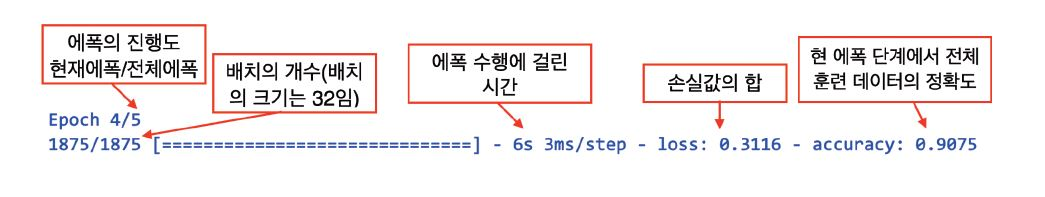

#### (5) 모델 평가: evaluate()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.2678 - acc: 0.9231 - 483ms/epoch - 2ms/step

테스트 정확도: 0.9230999946594238


신경망의 학습 데이터는 동일하지만 학습 때 사용되는 모델의 초기 가중치는 매번 랜덤하게 결정되므로 동일한 모델을 만들더라도 매번 정확도 값이 다르게 나타날 수 있음.

#### (6) 학습과정 살펴보기: 시각화

In [ ]:
print(history.history.keys())
print(history.history.items())

#'loss', 'acc'라는 이름으로 값이 들어 있다.

dict_keys(['loss', 'acc'])
dict_items([('loss', [0.22518771886825562, 0.09380805492401123, 0.06266109645366669, 0.0458679124712944, 0.032804083079099655]), ('acc', [0.934583306312561, 0.971666693687439, 0.981083333492279, 0.9857000112533569, 0.9895666837692261])])


#### * 결과 시각화 함수:draw_acc_loss()

In [ ]:
import matplotlib.pyplot as plt

def draw_acc_loss(his_dict):
    loss = his_dict['loss']

    epochs = range(1, len(loss) + 1)
    plt.figure(figsize = (5, 5))

    # 훈련 손실 및 정확도 그리기
    plt.plot(epochs, his_dict['acc'], color = 'red', label = 'train_acc')
    plt.plot(epochs, loss, color = 'blue', label = 'train_loss')
    plt.title('train loss / accruacy')
    plt.xlabel('epochs')
    plt.ylabel('loss / accuracy')
    plt.ylim([0,1])
    plt.legend()

    plt.show()

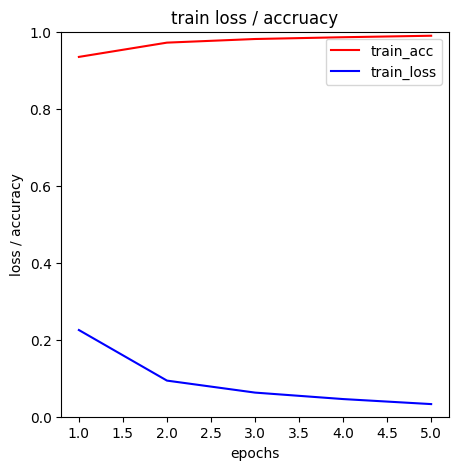

In [ ]:
draw_acc_loss(history.history)

### 1-6. 인공 신경망의 성능 개선

인공 신경망의 성능을 조금 더 개선하는 방법

1. 데이터를 더 많이 사용하기
2. 모델을 바꾸기 (학습을 위한 은닉층을 더 깊게 만들기, 노드의 개수 늘리기)
3. 하이퍼파라미터(epoch, batch_size 등) 튜닝하기 등의 방법이 있을 수 있다.

#### (1) 은닉층 추가 I

In [ ]:
# 은닉층 추가
#    keras.layers.Dense(128, activation='relu'),
#    keras.layers.Dense(64, activation='relu'),
#    2의 배수

model_3 = keras.Sequential([
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(64, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

model_3.fit(X_train, y_train, epochs=5, verbose=1)

test_loss, test_acc = model_3.evaluate(X_test, y_test, verbose=0)
print('\n테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7025 - acc: 0.7737
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3565 - acc: 0.8931
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2645 - acc: 0.9209
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2001 - acc: 0.9395
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1620 - acc: 0.9508

테스트 정확도: 0.9495000243186951


#### (2) 은닉층 추가 II

In [ ]:
# 은닉층 추가
#    keras.layers.Dense(1256, activation='relu'),
#    keras.layers.Dense(512, activation='relu'),

model_5 = keras.Sequential([
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dense(1256, activation='relu'),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(64, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])

model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 1256)              985960    
                                                                 
 dense_7 (Dense)             (None, 512)               643584    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:
model_5.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history = model_5.fit(X_train, y_train, epochs=5, verbose=1)

test_loss, test_acc = model_5.evaluate(X_test,  y_test, verbose=0)
print('\n테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2205 - acc: 0.9341
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1048 - acc: 0.9703
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0806 - acc: 0.9780
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0596 - acc: 0.9834
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0478 - acc: 0.9868

테스트 정확도: 0.9736999869346619


- 단순한 구조로 층만 깊이 쌓을 경우 출력 부분의 오차값을 이용하여 학습을 시키는 신경망 구조의 특성상 오차가 잘 전파되지 않는다.
- 층이 깊어질수록 입력에 따라 다른 동작을 내도록 조정하기 어려워진다는 문제도 있다.
- 이 때문에 모델의 층을 무작정 깊이 만드는 방법은 한계를 가지고 있다.

그러면 레이어 수와 은닉층의 노드 개수를 어떻게 정할까?
1. 문제의 복잡성 2. 데이터의 양 3. 하드웨어 및 시간 고려
2. 파라미터 수를 비슷하게 놓았을 때에도, 많은 노드 + 얕은 레이어 vs 적은 노드 + 깊은 레이어 중 선택
3. https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw 페이지 아래쪽에 있는 내용을 참고하자
4. 고려해야 할 특징이나 방식이 고차원적인 경우는 노드 수를 줄여서라도 레이어 수를 늘리고. 다양한 입력 데이터를 동시에 분석해야 할 일이 많다면 노드를 많게 하기도 함

#### (3) 각 layer의 노드의 수 조절

In [ ]:
# 각자 해보기

#### (4) 하이퍼파라미터 조절

epochs, batch_size, optimizer 등을 조정하며 테스트 해볼 수 있다

In [ ]:
# 각자 해보기

# 하지만 이 데이터의 경우 원래의 정확도가 높아서 더 높이려고 애쓸 필요가 없다..................

#### (5) 검증 데이터셋으로 검증하기

만일 원래의 train set을 train set과 validation set으로 나누어 검증하며 학습하면 성능이 더 좋아질까?

새로운 데이터 구성
- X_train (60,000개, train 데이터) = XX_train(48,000개, train 데이터) + XX_test(12,000개, validation 데이터)
- X_test (10,000개, test 데이터)

- y_train (60,000개, train 데이터) = yy_train(48,000개, train 데이터) + yy_test(12,000개, validation 데이터)
- y_test (10,000개, test 데이터)

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 데이터를 7:3의 비율로 분리해서 훈련데이터와 검증데이터를 만든다
XX_train, XX_val, yy_train, yy_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 777)
# random_state = 777 seed같은 역할 숫자는 아무거나 괜찮음
print(f'훈련 데이터:{XX_train.shape}, 레이블:{yy_train.shape}')
print(f'검증 데이터:{XX_val.shape}, 레이블:{yy_val.shape}')

훈련 데이터:(42000, 28, 28), 레이블:(42000,)
검증 데이터:(18000, 28, 28), 레이블:(18000,)


가장 초기에 구성한 모델을 그대로 사용해서 학습을 시킨다

In [ ]:
history = model.fit(XX_train, yy_train, epochs = 5, validation_data = (XX_val, yy_val))
# 뒤에 있는 fashion MNIST 예제에서는 다음과 같이 해서 교차검증함
# history = model.fit(X_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2719 - acc: 0.9216 - val_loss: 0.2622 - val_acc: 0.9232
Epoch 2/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2596 - acc: 0.9249 - val_loss: 0.2562 - val_acc: 0.9273
Epoch 3/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2485 - acc: 0.9290 - val_loss: 0.2441 - val_acc: 0.9276
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2381 - acc: 0.9316 - val_loss: 0.2372 - val_acc: 0.9322
Epoch 5/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2275 - acc: 0.9356 - val_loss: 0.2262 - val_acc: 0.9354


학습 결과를 그려보자

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

#### * 결과 시각화 함수:draw_acc_loss_val()

In [ ]:
import matplotlib.pyplot as plt

def draw_acc_loss_val(his_dict):
    loss = his_dict['loss']
    val_loss = his_dict['val_loss'] # 검증 데이터

    epochs = range(1, len(loss) + 1)
    plt.figure(figsize = (10, 5))

    # 훈련 및 검증 손실 그리기
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, color = 'blue', label = 'train_loss')
    plt.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
    plt.title('train and val loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()

    acc = his_dict['acc']
    val_acc = his_dict['val_acc']

    # 훈련 및 검증 정확도 그리기
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, color = 'red', label = 'train_acc')
    plt.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
    plt.title('train and val accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()

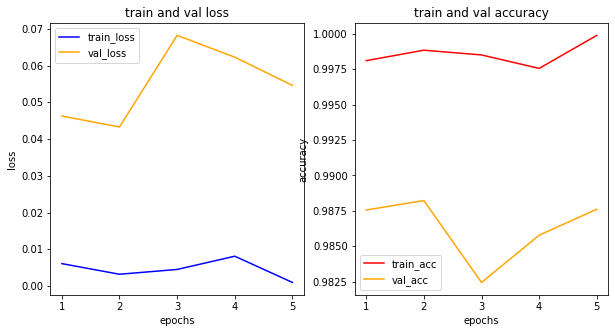

In [ ]:
draw_acc_loss_val(history.history)

초기의 모델에서 epochs 수만 늘려서 학습시켜 보자: fit()

In [ ]:
history = model.fit(XX_train, yy_train, epochs = 50, validation_data = (XX_val, yy_val))

Epoch 1/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0102 - val_acc: 0.9964
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0116 - val_acc: 0.9960
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0247 - val_acc: 0.9919
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0048 - acc: 0.9983 - val_loss: 0.0101 - val_acc: 0.9967
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 3.2797e-04 - acc: 1.0000 - val_loss: 0.0107 - val_acc: 0.9966
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0091 - acc: 0.9972 - val_loss: 0.0164 - val_acc: 0.9947
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0186 - val_acc: 0.9937
Epoch 8/50
1313/1313 [==============================] - 5s

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\n테스트 정확도:', test_acc)


테스트 정확도: 0.9366999864578247


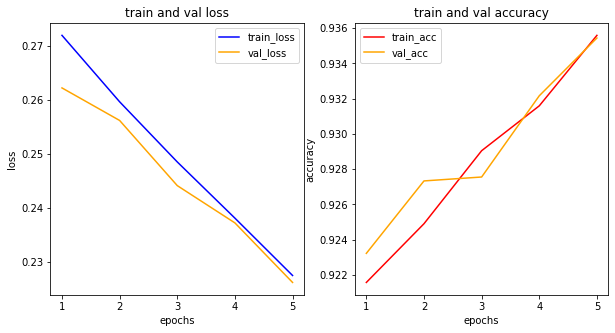

In [ ]:
draw_acc_loss_val(history.history)

### 1-7. 새로운 이미지로 테스트

In [ ]:
X_test.shape

(10000, 28, 28)

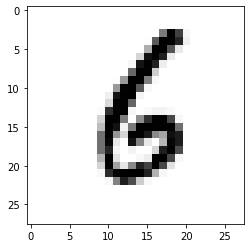

In [ ]:
randIdx = np.random.randint(0, 9999)   # 10,000개의 테스트 이미지 중 하나를 선택
plt.imshow(X_test[randIdx], cmap='Greys')

In [ ]:
# 2차원 데이터를 3차원으로 수정 필요 error 발생
y_hat = model.predict(X_test[randIdx])

ValueError: ignored

In [ ]:
# 각각의 레이블과 일치하는 정도를 0에서 1 사이의 확률값으로 출력
# 2차원 데이터를 3차원으로 수정 필요
y_hat = model.predict( X_test[randIdx][np.newaxis, :, :])
print(y_hat)
print("손글씨 판정: ", y_hat.argmax())

[[1.5661410e-04 7.8914363e-06 9.9851249e-04 2.1486232e-04 4.4300081e-04
  4.5098430e-03 9.9316144e-01 7.8407773e-08 4.8629346e-04 2.1400514e-05]]
손글씨 판정:  6


### [참고] 부드러운 최대값을 출력하는 소프트맥스 함수

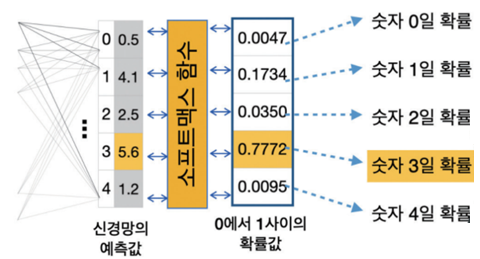

- 신경망은 0, 1, 2, 3, 4 노드에 대한 예측값을 임의의 실수로 반환, 이값들을 0에서 1사이의 확률값으로 만들어 주는 것이 소프트맥스함수가 하는 일

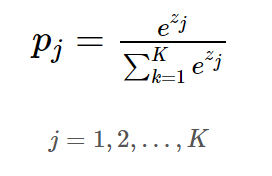

In [ ]:
import numpy as np

def softmax(a):
    exp_of_a = np.exp(a)       # 각각의 지수 함수
    sum_exp = np.sum(exp_of_a) # 지수 함수값의 합
    y = exp_of_a / sum_exp     # 각각의 확률값을 구함
    return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))

신경망의 예측값 : [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력 : [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [ ]:
print('소프트맥스 함수의 최대값 :', np.max(softmax(a)))
print('최대값의 인덱스 :', np.argmax(softmax(a)))

소프트맥스 함수의 최대값 : 0.7772704668966948
최대값의 인덱스 : 3


### 1-8. 본인의 손글씨로 테스트 하기

#### (1) 손글씨파일 업로드

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving myNumber.png to myNumber.png


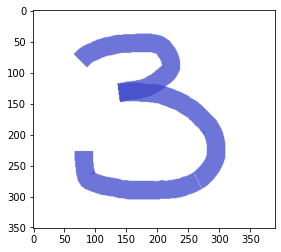

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./myNumber.png')
plt.imshow(img, cmap='Greys')

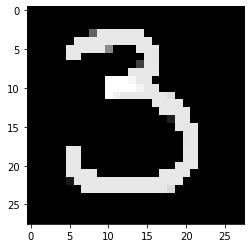

In [ ]:
# 이미지의 사이즈를 28X28로 맞춰주기 위해서 사용함
import cv2
img = cv2.imread('./myNumber.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28) )
plt.imshow(img, cmap='Greys')

#### (2) 분류예측 실행

In [ ]:
y_hat = model.predict( img[np.newaxis, :, :])
print(y_hat)
print("손글씨 판정: ", y_hat.argmax())

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
손글씨 판정:  3


#### !! 데이터의 전처리는 매우 중요하다

In [ ]:
for i in range(28):
    for j in range(28):
        print(f'{img[i][j]:4d}', end='')
    print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 208 131 131 131 131 131 131 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 131 131 131 131 131 131 131 131 131 131 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 131 131 131 131 131 186 255 255 255 131 131 131 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 131 131 255 255 255 255 255 255 255 255 131 132 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 225 131 131 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 131 131 131 131 255 255 255 255 255 255 255

In [ ]:
# 이미지의 색상을 반전시키고 0에서 1사이의 실수로 만들자
img = (255 - img) / 255

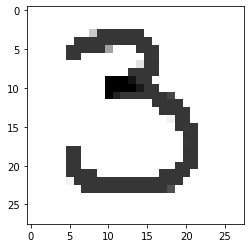

In [ ]:
plt.imshow(img, cmap='Greys')

#### (3) 전처리 후 분류예측 실행

In [ ]:
y_hat = model.predict( img[np.newaxis, :, :])
print(y_hat)
print("손글씨 판정: ", y_hat.argmax())

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
손글씨 판정:  3
